# Importing libraries

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import skimage
from skimage import transform
from tensorflow import keras

# Function for calcualting the accuracy of the classification

In [0]:
def acc(output,label):
    test=((output[:,0]-label)==0)*1.0
    return sum(test)/len(test)*100

# Network inputs

Loading data (Digits)

In [130]:
ix=28*28 # Number of features
epochs=20
digits=[0,1] # Digits to classify

# Loading data
mnist=keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Training

indices=np.append(np.where(train_labels==digits[0]),np.where(train_labels==digits[1]))
train=train_images[indices]
train=train.reshape(len(train),28*28)
print(train.shape)
# Additional column is added to the training set instead of calculating biases
train=np.concatenate((train,np.ones([len(train),1])),axis=1)
train_lbl=train_labels[indices]
train_lbl=(train_lbl==digits[1])*1.0

# Test

indices=np.append(np.where(test_labels==digits[0]),np.where(test_labels==digits[1]))
test=test_images[indices]
test=test.reshape(len(test),28*28)
test=np.concatenate((test,np.ones([len(test),1])),axis=1)
test_lbl=test_labels[indices]
test_lbl=(test_lbl==digits[1])*1.0

(12665, 784)


# Perceptron

In [0]:
# Training
w=np.random.rand(ix+1,1) # Weights initialization
print('\nTraining:\n')
for epoch in range(epochs):
    loss=0
    for i in range(len(train)):
        logits=np.einsum('i,ij->j',train[i],w)
        logits=(logits>0)*1.0 # Activation function
        error=train_lbl[i]-logits # Error calculation
        w=w+train[i].reshape(train[i].shape[0],1)*error # Weight update
        loss+=abs(error)

    # Training set accuracy
    logits=np.einsum('ij,jk->ik',train,w)
    logits=(logits>0)*1.0
    print('Epoch: {:}, error: {:0.2f} accuracy: {:0.2f}'.format(epoch,loss[0],acc(logits,train_lbl)))


# Test set accuracy
print('\nTest:\n')
logits=np.einsum('ij,jk->ik',test,w)
logits=(logits>0)*1.0
print('Test accuracy: {:0.2f}'.format(acc(logits,test_lbl)))


Training:

Epoch: 0, error: 4.00 accuracy: 71.72
Epoch: 1, error: 6.00 accuracy: 54.12
Epoch: 2, error: 7.00 accuracy: 95.92
Epoch: 3, error: 6.00 accuracy: 87.65
Epoch: 4, error: 5.00 accuracy: 97.89
Epoch: 5, error: 5.00 accuracy: 96.06
Epoch: 6, error: 7.00 accuracy: 98.40
Epoch: 7, error: 7.00 accuracy: 98.61
Epoch: 8, error: 5.00 accuracy: 99.18
Epoch: 9, error: 8.00 accuracy: 98.87
Epoch: 10, error: 5.00 accuracy: 98.85
Epoch: 11, error: 5.00 accuracy: 98.50
Epoch: 12, error: 5.00 accuracy: 99.84
Epoch: 13, error: 7.00 accuracy: 99.25
Epoch: 14, error: 5.00 accuracy: 99.55
Epoch: 15, error: 5.00 accuracy: 99.70
Epoch: 16, error: 6.00 accuracy: 99.54
Epoch: 17, error: 4.00 accuracy: 99.42
Epoch: 18, error: 4.00 accuracy: 99.64
Epoch: 19, error: 5.00 accuracy: 99.72

Test:

Test accuracy: 99.91


# Difference between Perceptron and ADALINE

![alt text](https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png)

# Image rotation

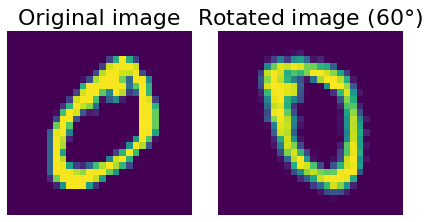

In [0]:
# Loading data
mnist=keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Original image
image=train_images[1]

# Rotated image
imager=skimage.transform.rotate(image,60)

# Plot
plt.subplot(121);plt.imshow(image,cmap='viridis');plt.grid(False);plt.axis('off');plt.title('Original image',fontsize=22);plt.tight_layout()
plt.subplot(122);plt.imshow(imager,cmap='viridis');plt.grid(False);plt.axis('off');plt.title('Rotated image (60$\degree$)',fontsize=22);plt.tight_layout()



# Adaline

In [0]:
# Training
alpha = 0.01
w=np.random.rand(ix+1,1) # Weights initialization
print('\nTraining:\n')
for epoch in range(epochs):
    loss=0
    for i in range(len(train)):
        s=np.einsum('i,ij->j',train[i],w)
        logits=1/(1+np.exp(-0.0001*s)) # Activation function
        error=train_lbl[i]-logits # Error calculation
        gradient=logits*(1-logits)
        deltaW=alpha*gradient*error*logits*train[i].reshape(train[i].shape[0],1)
        w=w+deltaW # Weight update
        loss+=abs(error)
        logits=np.round(logits)

    # Training set accuracy
    s=np.einsum('ij,jk->ik',train,w)
    logits=1/(1+np.exp(-0.0001*s)) # Activation function
    logits=np.round(logits)
    print('Epoch: {:}, error: {:0.2f} accuracy: {:0.2f}'.format(epoch,loss[0],acc(logits,train_lbl)))


# Test set accuracy
print('\nTest:\n')
s=np.einsum('ij,jk->ik',test,w)
logits=1/(1+np.exp(-0.0001*s)) # Activation function
logits=np.round(logits)
print('Test accuracy: {:0.2f}'.format(acc(logits,test_lbl)))


Training:

Epoch: 0, error: 142.38 accuracy: 81.70
Epoch: 1, error: 94.87 accuracy: 98.13
Epoch: 2, error: 81.51 accuracy: 99.24
Epoch: 3, error: 73.60 accuracy: 99.56
Epoch: 4, error: 67.75 accuracy: 99.62
Epoch: 5, error: 62.99 accuracy: 99.67
Epoch: 6, error: 59.02 accuracy: 99.72
Epoch: 7, error: 55.63 accuracy: 99.74
Epoch: 8, error: 52.71 accuracy: 99.76
Epoch: 9, error: 50.21 accuracy: 99.79
Epoch: 10, error: 48.08 accuracy: 99.81
Epoch: 11, error: 46.27 accuracy: 99.82
Epoch: 12, error: 44.73 accuracy: 99.83
Epoch: 13, error: 43.40 accuracy: 99.86
Epoch: 14, error: 42.24 accuracy: 99.86
Epoch: 15, error: 41.19 accuracy: 99.86
Epoch: 16, error: 40.21 accuracy: 99.87
Epoch: 17, error: 39.27 accuracy: 99.87
Epoch: 18, error: 38.36 accuracy: 99.87
Epoch: 19, error: 37.47 accuracy: 99.89

Test:

Test accuracy: 99.95


# Rotation test only

In [131]:
# Training
alpha = 0.01
w=np.random.rand(ix+1,1) # Weights initialization
print('\nTraining:\n')
for epoch in range(epochs):
    loss=0
    for i in range(len(train)):
        s=np.einsum('i,ij->j',train[i],w)
        logits=1/(1+np.exp(-0.0001*s)) # Activation function
        error=train_lbl[i]-logits # Error calculation
        gradient=logits*(1-logits)
        deltaW=alpha*gradient*error*train[i].reshape(train[i].shape[0],1)
        w=w+deltaW # Weight update
        loss+=abs(error)

    # Training set accuracy
    s=np.einsum('ij,jk->ik',train,w)
    logits=1/(1+np.exp(-0.0001*s)) # Activation function
    logits=np.round(logits)
    print('Epoch: {:}, error: {:0.2f} accuracy: {:0.2f}'.format(epoch,loss[0],acc(logits,train_lbl)))


Training:

Epoch: 0, error: 142.48 accuracy: 82.24
Epoch: 1, error: 94.99 accuracy: 98.18
Epoch: 2, error: 81.57 accuracy: 99.24
Epoch: 3, error: 73.72 accuracy: 99.56
Epoch: 4, error: 67.85 accuracy: 99.62
Epoch: 5, error: 63.08 accuracy: 99.68
Epoch: 6, error: 59.08 accuracy: 99.72
Epoch: 7, error: 55.68 accuracy: 99.74
Epoch: 8, error: 52.75 accuracy: 99.77
Epoch: 9, error: 50.24 accuracy: 99.79
Epoch: 10, error: 48.10 accuracy: 99.80
Epoch: 11, error: 46.28 accuracy: 99.82
Epoch: 12, error: 44.73 accuracy: 99.83
Epoch: 13, error: 43.40 accuracy: 99.85
Epoch: 14, error: 42.24 accuracy: 99.86
Epoch: 15, error: 41.20 accuracy: 99.86
Epoch: 16, error: 40.22 accuracy: 99.86
Epoch: 17, error: 39.29 accuracy: 99.87
Epoch: 18, error: 38.39 accuracy: 99.88
Epoch: 19, error: 37.51 accuracy: 99.89


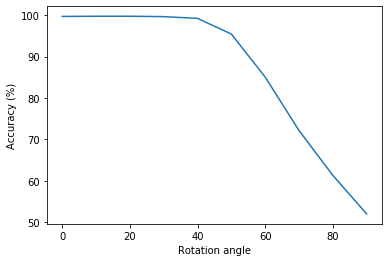

In [132]:
# Test set accuracy for rotated datasets
testRotated=np.empty(test.shape)
angles=np.empty(10)
accuracies=np.empty(10)
for j in range(10):
  for i in range(len(test)):
    image=np.reshape(test[i][1:],(28,28))
    imageRotated=skimage.transform.rotate(image,j*10)
    imageRotated=imageRotated.reshape(28*28)
    imageRotated=np.concatenate((imageRotated,np.ones([1])),axis=0)
    testRotated[i]=imageRotated

  angles[j]=j*10
  s=np.einsum('ij,jk->ik',testRotated,w)
  logits=(1/(1+np.exp(-0.0001*s))) # Activation function
  logits=np.round(logits)
  accuracies[j]=acc(logits,test_lbl)

plt.plot(angles,accuracies)
plt.xlabel('Rotation angle')
plt.ylabel('Accuracy (%)')
plt.show()

# Rotation train + test

In [138]:
# Training
alpha=0.1
w=np.random.rand(ix+1,1) # Weights initialization
epochs=10
trainRotated=np.empty([train.shape[0]*10,train.shape[1]])
trainRotated_lbl=np.empty([train.shape[0]*10])

print('\nTraining:\n')
count=0
for epoch in range(epochs):
    loss=0
    for j in range(10):   
        for i in range(len(train)):
            s=np.einsum('i,ij->j',train[i],w)
            logits=1/(1+np.exp(-0.0001*s)) # Activation function
            error=train_lbl[i]-logits # Error calculation
            gradient=logits*(1-logits)
            deltaW=alpha*gradient*error*train[i].reshape(train[i].shape[0],1)*logits
            w=w+deltaW # Weight update
            logits=np.round(logits)

            if j>0:
              image=np.reshape(train[i][1:],(28,28))
              imageRotated=skimage.transform.rotate(image,j*10)
              imageRotated=imageRotated.reshape(28*28)
              imageRotated=np.transpose(np.concatenate((imageRotated,np.ones([1])),axis=0))
              trainRotated[j*train.shape[0]+i]=imageRotated;
              s=np.einsum('i,ij->j',trainRotated[j*train.shape[0]+i],w)
              logits=(1/(1+np.exp(-0.0001*s))) # Activation function
              error=train_lbl[i]-logits # Error calculation
              gradient=logits*(1-logits)
              deltaW=alpha*gradient*error*logits*trainRotated[i].reshape(trainRotated[i].shape[0],1)
              w=w+deltaW # Weight update
              trainRotated_lbl[j*train.shape[0]+i]=train_lbl[i]
              logits=np.round(logits)
              count+=count

        loss+=abs(error)

    # Training set accuracy
    s=np.einsum('ij,jk->ik',trainRotated,w)
    logits=(1/(1+np.exp(-0.0001*s))) # Activation function
    logits=np.round(logits)
    print('Epoch: {:}, error: {:0.2f} accuracy: {:0.2f}'.format(epoch,loss[0],acc(logits,trainRotated_lbl)))


Training:

Epoch: 0, error: 0.01 accuracy: 81.38
Epoch: 1, error: 0.00 accuracy: 83.51


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in exp


Epoch: 2, error: 0.00 accuracy: 84.22
Epoch: 3, error: 0.00 accuracy: 84.47
Epoch: 4, error: 0.00 accuracy: 84.81
Epoch: 5, error: 0.00 accuracy: 84.99
Epoch: 6, error: 0.00 accuracy: 84.90
Epoch: 7, error: 0.00 accuracy: 84.91
Epoch: 8, error: 0.00 accuracy: 84.81
Epoch: 9, error: 0.00 accuracy: 84.88



Test: rotation 0.000000

Test accuracy: 0.00

Test: rotation 10.000000

Test accuracy: 0.00

Test: rotation 20.000000

Test accuracy: 0.00

Test: rotation 30.000000

Test accuracy: 0.00

Test: rotation 40.000000

Test accuracy: 0.00

Test: rotation 50.000000

Test accuracy: 0.00

Test: rotation 60.000000

Test accuracy: 0.00

Test: rotation 70.000000

Test accuracy: 0.00

Test: rotation 80.000000

Test accuracy: 0.00

Test: rotation 90.000000

Test accuracy: 0.00


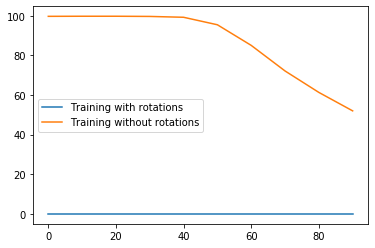

In [139]:
angles2=np.empty(10)
accuracies2=np.empty(10)
testRotated=np.empty(test.shape)
for j in range(10):
    for i in range(len(test)):
        image=np.reshape(test[i][1:],(28,28))
        imageRotated=skimage.transform.rotate(image,j*10)
        imageRotated=imageRotated.reshape(28*28)
        imageRotated=np.transpose(np.concatenate((imageRotated,np.ones([1])),axis=0))
        testRotated[i]=imageRotated;

    # Test set accuracy
    print('\nTest: rotation {:f}\n'.format(j*10))
    angles2[j]=j*10
    logits=np.einsum('ij,jk->ik',testRotated,w)
    logits=np.round(logits)  
    print('Test accuracy: {:0.2f}'.format(acc(logits,test_lbl)))
    accuracies2[j]=acc(logits,test_lbl)
    
plt.plot(angles2,accuracies2, angles,accuracies)
plt.gca().legend(('Training with rotations','Training without rotations'))
plt.show()